In [1]:
import pandas as pd
import numpy as np
from IPython.display import display 
from sklearn.utils import shuffle
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path='C:/Users/Ankit/Downloads/wine.data'
names=['class','Alcohol','Malic Acid','Ash','Alcalinity of ash','Magnesium','Total Phenols','Flavanoids','NonFlavanoid Phenols','Proanthyocyanins','color intensity','Hue','OD280/OD315','Proline']
dataset=pd.read_csv(path,names=names)

In [4]:
display(dataset.head())

,class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoid Phenols,Proanthyocyanins,color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
display(dataset.shape)

(178, 14)

In [6]:
display(dataset.describe())

,class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoid Phenols,Proanthyocyanins,color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
print(dataset.groupby('class').size())

class
1    59
2    71
3    48
dtype: int64


In [8]:
names1=['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 'NonFlavanoid Phenols', 'Proanthyocyanins', 'color intensity', 'Hue', 'OD280/OD315', 'Proline']
#nested for loop to normalize the values
for name in names1:
    mean=dataset[name].mean()
    standard_dev=dataset[name].std()
    for it in range(0,178):
        dataset.loc[it,name]=(dataset.loc[it,name]-mean)/standard_dev

In [9]:
display(dataset.head())

,class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoid Phenols,Proanthyocyanins,color intensity,Hue,OD280/OD315,Proline
0,1,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,1,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,1,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [10]:
dataset.insert(1,'Bias',1)

In [11]:
dataset=shuffle(dataset)
dataset=dataset.reset_index()
del dataset['index']
display(dataset.head())

,class,Bias,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoid Phenols,Proanthyocyanins,color intensity,Hue,OD280/OD315,Proline
0,3,1,0.393412,0.808893,0.049147,0.600395,-0.542033,-0.583385,-1.270720,0.708266,-0.595603,1.450171,-1.782590,-1.396759,-0.307688
1,1,1,0.344140,-0.623328,1.725874,-1.196247,0.718252,0.487157,0.651474,-0.175599,-0.403416,-0.197599,0.579908,0.237066,0.422685
2,1,1,-0.086987,1.310170,1.033313,-0.267982,0.158126,0.183570,0.381165,-0.898762,0.679820,-0.240734,0.317409,1.279334,0.073376
3,1,1,1.304936,-0.166807,0.887510,-0.567423,1.488427,0.487157,0.481280,-0.416654,-0.595603,-0.003490,0.448658,1.363842,1.740533
4,3,1,0.590498,-0.596474,0.996862,0.899835,-0.752080,0.487157,-0.930331,1.270726,1.221438,2.886577,-1.695090,-1.171404,-0.402954


In [12]:
X_train=dataset.iloc[:140,1:]
Y_train=dataset.iloc[:140,0:1]
X_test=dataset.iloc[140:178,1:]
Y_test=dataset.iloc[140:178,0:1]
train_shape=Y_train.shape
test_shape=Y_test.shape
Y_train1=np.zeros(train_shape)
Y_train2=np.zeros(train_shape)
Y_train3=np.zeros(train_shape)
Y_test1=np.zeros(test_shape)
Y_test2=np.zeros(test_shape)
Y_test3=np.zeros(test_shape)

In [13]:
for i in range(0,Y_train.shape[0]):
    if Y_train.iloc[i,0]==1:
        Y_train1[i][0]=1
        Y_train2[i][0]=0
        Y_train3[i][0]=0
    if Y_train.iloc[i,0]==2:
        Y_train1[i][0]=0
        Y_train2[i][0]=1
        Y_train3[i][0]=0
    else:
        Y_train1[i][0]=0
        Y_train2[i][0]=0
        Y_train3[i][0]=1

In [14]:
for i in range(0,Y_test.shape[0]):
    if Y_test.iloc[i,0]==1:
        Y_test1[i][0]=1
        Y_test2[i][0]=0
        Y_test3[i][0]=0
    if Y_test.iloc[i,0]==2:
        Y_test1[i][0]=0
        Y_test2[i][0]=1
        Y_test3[i][0]=0
    else:
        Y_test1[i][0]=0
        Y_test2[i][0]=0
        Y_test3[i][0]=1

In [15]:
X_train.shape

(140, 14)

In [16]:
def sigmoid(theta,X):
    den=1.0+np.exp(-X.dot(np.transpose(theta)))
    return 1.0/den

In [17]:
#theta=np.zeros((1,X_train.shape[1]))
#ans=sigmoid(theta,X_train)
def grad_func(theta,X,y):
    term1=sigmoid(theta,X)-y
    term2=np.transpose(term1).dot(X)
    term2=term2/X.shape[0]
    return term2

In [18]:
def cost_func(theta,X,y):
    m=X.shape[0]
    hx=sigmoid(theta,X)
    y=np.transpose(y)
    term1=y.dot(np.log(hx))
    term2=(1-y).dot(np.log(1-hx))
    res=(-1.0/m)*(term1+term2)
    return res;

In [19]:
def gradient_descent(theta,X,y):
    cost_iter=[]
    alpha=0.001
    cost=cost_func(theta,X,y)
    gradient=grad_func(theta,X,y)
    cost_iter.append([0,cost])
    for i in range(0,40001):
        theta=theta-(alpha*gradient)
        gradient=grad_func(theta,X,y)
        cost=cost_func(theta,X,y)
        cost_iter.append([i,cost])
    return theta,cost_iter

In [20]:
theta=np.zeros((1,X_train.shape[1]))
theta_final1,cost_iter1=gradient_descent(theta,X_train,Y_train1)
cost_iter1=np.array(cost_iter1)

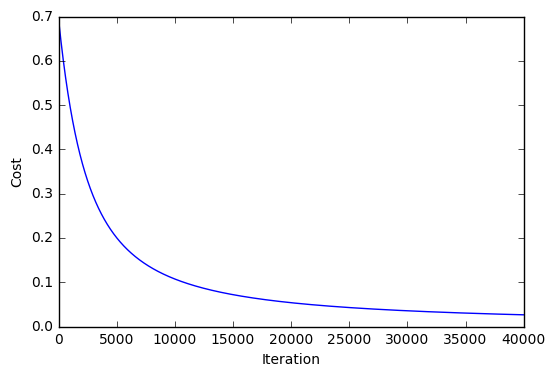

In [21]:
plt.plot(cost_iter1[:,0], cost_iter1[:,1])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [22]:
def predict(theta,X):
    pred_prob=sigmoid(theta,X)
    m=X.shape[0]
    pred_val=np.where(pred_prob>=0.5,1,0)
    return pred_val

In [26]:
theta_final2,cost_iter2=gradient_descent(theta,X_train,Y_train2)
cost_iter2=np.array(cost_iter2)

In [162]:
theta_final3,cost_iter3=

38

In [163]:
np.sum(Y_test==pred_val)

37

# Logistic Regression with Regularization

In [164]:
def cost_func_regularized(theta,lamda,X,y):
    m=X.shape[0]#0 is for the horizontal axis number
    n=X.shape[1]#1 is the number of columns
    hx=sigmoid(theta,X)
    #hx has dimension m*1
    y=np.transpose(y)
    term1=y.dot(np.log(hx))
    term2=(1-y).dot(np.log(1-hx))
    term3=0
    for i in range(1,n):
        term3=term3+(theta[0][i]*theta[0][i])
    cost=(-1.0/m)*(term1+term2) +(lamda/(2.0*m))*term3
    return cost

In [165]:
def gradient_calculation_regularized(theta,lamda,X,y):
    term1=sigmoid(theta,X)-y
    term2=np.transpose(term1).dot(X)
    n=theta.shape[1]
    m=X.shape[0]
    for it in range(1,n):
        term2[0][it]=term2[0][it]+lamda*theta[0][it]
    term2=term2/m
    return term2

In [166]:
def logistic_regression_regularized(theta,alpha,lamda,X,y):
    cost_iter=[]
    cost=cost_func_regularized(theta,lamda,X,y)
    cost_iter.append([0,cost])
    gradient=gradient_calculation_regularized(theta,lamda,X,y)
    for i in range(1,40001):
        theta=theta-alpha*gradient
        gradient=gradient_calculation_regularized(theta,lamda,X,y)
        cost=cost_func_regularized(theta,lamda,X,y)
        cost_iter.append([i,cost])
    return theta,cost_iter

In [167]:
theta_reg=np.zeros((1,X_train.shape[1]))
theta_reg,cost_iter1=logistic_regression_regularized(theta_reg,0.001,0.003,X_train,Y_train)

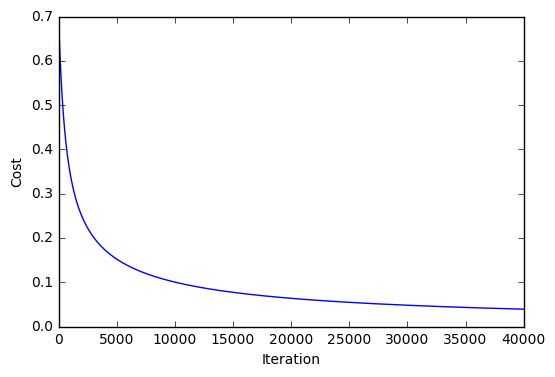

In [168]:
cost_iter1=np.array(cost_iter1)
plt.plot(cost_iter1[:,0],cost_iter1[:,1])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [169]:
theta_reg

array([[-1.29719287,  1.2030672 ,  0.22097746,  0.70045361, -1.29721085,
         0.5000287 ,  0.22804723,  0.80748011, -0.04021212,  0.04317049,
         0.07069226,  0.02790358,  0.84481947,  1.55585811]])

In [170]:
pred_val_reg=predict(theta_reg,X_test)

In [171]:
np.sum(Y_test==pred_val_reg)

37